## **<span style="color:gray; font-family:Garamond;"> Final Project - Group 45**

![תיאור התמונה](https://raw.githubusercontent.com/lauMren/Journalists-Project/main/%D7%A6%D7%99%D7%9C%D7%95%D7%9D%20%D7%9E%D7%A1%D7%9A%202024-06-15%20010310.png)


<b id="Top"> </b>  

1. [Libraries ;](#1)
2. [Add Columns And Order ;](#2)

<a id='1'></a>

# <b id="section_1">  </b> <b style='color:brown; font-family:Garamond;'>1. Libraries ; </b> <b></b> 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sklearn as sk
from IPython.display import Image

url = 'https://raw.githubusercontent.com/lauMren/Journalists-Project/main/cpj.csv'
#define -> name of data = jour
jour = pd.read_csv(url)
jour.head(4)

,Type,Date,Name,Sex,Country_killed,Organization,Nationality,Medium,Job,Coverage,Freelance,Local_Foreign,Source_fire,Type_death,Impunity_for_murder,Taken_captive,Threatened,Tortured
0,Motive Confirmed,"October 22, 2016",Ali Risan,Male,Iraq,Al-Sumaria TV,Iraqi,"Television, Internet",Camera Operator,War,No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n
1,Motive Confirmed,"October 21, 2016",Ahmet Haceroğlu,Male,Iraq,Türkmeneli TV,Iraqi,Television,Producer,"Politics, War",No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n
2,Motive Confirmed,"October 2, 2016",Jeroen Oerlemans,Male,Libya,Freelance,Netherlands,"Print, Internet",Photographer,"Politics, War",Yes,Foreign,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,\n
3,Motive Confirmed,"August 14, 2016",Mustafa Said,Male,Iraq,Kurdistan TV,Iraqi,Television,Camera Operator,War,No,Local,Unknown Fire,Crossfire/Combat-Related,NaN,No,No,No\n


In [2]:
jour['Tortured'] = jour['Tortured'].str.replace(r'\n', '').str.strip()
jour['Tortured'].replace('', np.nan, inplace=True)
unique_tor = jour['Tortured'].unique()
jour

C:\Users\loren\AppData\Local\Temp\ipykernel_14584\4066483320.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  jour['Tortured'].replace('', np.nan, inplace=True)


,Type,Date,Name,Sex,Country_killed,Organization,Nationality,Medium,Job,Coverage,Freelance,Local_Foreign,Source_fire,Type_death,Impunity_for_murder,Taken_captive,Threatened,Tortured
0,Motive Confirmed,"October 22, 2016",Ali Risan,Male,Iraq,Al-Sumaria TV,Iraqi,"Television, Internet",Camera Operator,War,No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,NaN
1,Motive Confirmed,"October 21, 2016",Ahmet Haceroğlu,Male,Iraq,Türkmeneli TV,Iraqi,Television,Producer,"Politics, War",No,Local,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,NaN
2,Motive Confirmed,"October 2, 2016",Jeroen Oerlemans,Male,Libya,Freelance,Netherlands,"Print, Internet",Photographer,"Politics, War",Yes,Foreign,Political Group,Crossfire/Combat-Related,NaN,NaN,NaN,NaN
3,Motive Confirmed,"August 14, 2016",Mustafa Said,Male,Iraq,Kurdistan TV,Iraqi,Television,Camera Operator,War,No,Local,Unknown Fire,Crossfire/Combat-Related,NaN,No,No,No
4,Motive Confirmed,"August 8, 2016",Shehzad Ahmed,NaN,Pakistan,Aaj News,Pakistani,Television,Camera Operator,"Business, Corruption, Crime, Culture, Human Ri...",No,Local,Political Group,Dangerous Assignment,NaN,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,Motive Unconfirmed,"August 3, 1992",Robinson Joseph,NaN,Haiti,Radio Lumière,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1778,Motive Unconfirmed,"July 3, 1992",Ladjid Jade Ladja,NaN,Philippines,Prensa Zamboanga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1779,Motive Unconfirmed,"June 2, 1992",Mecit Akgun,NaN,Turkey,Yeni Ulke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1780,Motive Unconfirmed,"February 27, 1992",Bakshi Tirath Singh,NaN,India,Hind Samachar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#name of columns:

shape = jour.shape
print(shape)
jour.columns

(1782, 18)


Index(['Type', 'Date', 'Name', 'Sex', 'Country_killed', 'Organization',
       'Nationality', 'Medium', 'Job', 'Coverage', 'Freelance',
       'Local_Foreign', 'Source_fire', 'Type_death', 'Impunity_for_murder',
       'Taken_captive', 'Threatened', 'Tortured'],
      dtype='object')

# <b id="section_2">  </b> <b style='color:brown; font-family:Garamond;'>2. Add Columns And Order ; </b> <b></b> 

##### <div style="text-align: left; direction: rtl;"> נבצע מספר שינויים בדאטה פריים: הוספת קטגוריות ושינויי type 
</div>

In [4]:
jour['Date'] = pd.to_datetime(jour['Date'], errors='coerce')
jour['Year'] = jour['Date'].dt.year
jour['Month'] = jour['Date'].dt.month

In [5]:
# פונקציה שמסווגת לפי עונות את העמודה "חודש"-שהוספנו באיטרציה קודמת

def classify_season(Month):
    if Month in [12.0, 1.0, 2.0]:
        return 'Winter'
    elif Month in [3.0, 4.0, 5.0]:
        return 'Spring'
    elif Month in [6.0, 7.0, 8.0]:
        return 'Summer'
    elif Month in [9.0, 10.0, 11.0]:
        return 'Fall'
    else:
        return 'Unknown'

jour['Season'] = jour['Month'].apply(classify_season)
print(jour['Season'])

0         Fall
1         Fall
2         Fall
3       Summer
4       Summer
         ...  
1777    Summer
1778    Summer
1779    Summer
1780    Winter
1781    Winter
Name: Season, Length: 1782, dtype: object


In [6]:
# separate by comma to make SubCategories

jour['Coverage'] = jour['Coverage'].fillna('').astype(str)
jour['Classify cover'] = jour['Coverage'].apply(lambda x: x.split(', '))

In [7]:
# הפרדה של עמודת הסיקור לקטגוריות מוגדרות ללא פסיקים.

unique_coverage = set([category for sublist in jour['Classify cover'] for category in sublist])
print(unique_coverage)

{'', 'Business', 'Crime', 'Politics', 'Culture', 'Corruption', 'Sports', 'Human Rights', 'War'}


In [8]:
for category in unique_coverage:
    jour[category] = jour['Classify cover'].apply(lambda x: category in x)

In [9]:
###### כאן, נהפוך את העמודות שיצרנו (שהיו בוליאנים) לטייפ אינט כדי לסכום בקלות בהמשך במידה ונצטרך
jour[['War', 'Sports', 'Human Rights', 'Politics', 'Culture','Business', 'Corruption', 'Crime']] = jour[['War', 'Sports', 'Human Rights', 'Politics', 'Culture','Business', 'Corruption', 'Crime']].astype(int)

In [10]:
# מיני סקירה על תוכן הדאטה החדש, לצורך נוחות בהמשך

jour.info()
empty = jour.isnull().sum()
jour

# לבסוף נקבל דאטה פריים חדש עם עמודות חדשות

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Type                 1782 non-null   object        
 1   Date                 1708 non-null   datetime64[ns]
 2   Name                 1782 non-null   object        
 3   Sex                  1216 non-null   object        
 4   Country_killed       1781 non-null   object        
 5   Organization         1779 non-null   object        
 6   Nationality          1499 non-null   object        
 7   Medium               1216 non-null   object        
 8   Job                  1210 non-null   object        
 9   Coverage             1782 non-null   object        
 10  Freelance            1217 non-null   object        
 11  Local_Foreign        1217 non-null   object        
 12  Source_fire          1215 non-null   object        
 13  Type_death           1217 non-nul

,Type,Date,Name,Sex,Country_killed,Organization,Nationality,Medium,Job,Coverage,...,Classify cover,,Business,Crime,Politics,Culture,Corruption,Sports,Human Rights,War
0,Motive Confirmed,2016-10-22,Ali Risan,Male,Iraq,Al-Sumaria TV,Iraqi,"Television, Internet",Camera Operator,War,...,[War],False,0,0,0,0,0,0,0,1
1,Motive Confirmed,2016-10-21,Ahmet Haceroğlu,Male,Iraq,Türkmeneli TV,Iraqi,Television,Producer,"Politics, War",...,"[Politics, War]",False,0,0,1,0,0,0,0,1
2,Motive Confirmed,2016-10-02,Jeroen Oerlemans,Male,Libya,Freelance,Netherlands,"Print, Internet",Photographer,"Politics, War",...,"[Politics, War]",False,0,0,1,0,0,0,0,1
3,Motive Confirmed,2016-08-14,Mustafa Said,Male,Iraq,Kurdistan TV,Iraqi,Television,Camera Operator,War,...,[War],False,0,0,0,0,0,0,0,1
4,Motive Confirmed,2016-08-08,Shehzad Ahmed,NaN,Pakistan,Aaj News,Pakistani,Television,Camera Operator,"Business, Corruption, Crime, Culture, Human Ri...",...,"[Business, Corruption, Crime, Culture, Human R...",False,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,Motive Unconfirmed,1992-08-03,Robinson Joseph,NaN,Haiti,Radio Lumière,NaN,NaN,NaN,,...,[],True,0,0,0,0,0,0,0,0
1778,Motive Unconfirmed,1992-07-03,Ladjid Jade Ladja,NaN,Philippines,Prensa Zamboanga,NaN,NaN,NaN,,...,[],True,0,0,0,0,0,0,0,0
1779,Motive Unconfirmed,1992-06-02,Mecit Akgun,NaN,Turkey,Yeni Ulke,NaN,NaN,NaN,,...,[],True,0,0,0,0,0,0,0,0
1780,Motive Unconfirmed,1992-02-27,Bakshi Tirath Singh,NaN,India,Hind Samachar,NaN,NaN,NaN,,...,[],True,0,0,0,0,0,0,0,0


<div dir="rtl">
    
##### 1 - הוספת עמודות: חודש, שנה ועונות השנה
##### 2 - תחום הסיקור של העיתונאי - הפיכה מטיפוס בוליאני למספר

</div>

# <b id="section_3">  </b> <b style='color:brown; font-family:Garamond;'>3. Review ; </b> <b></b>

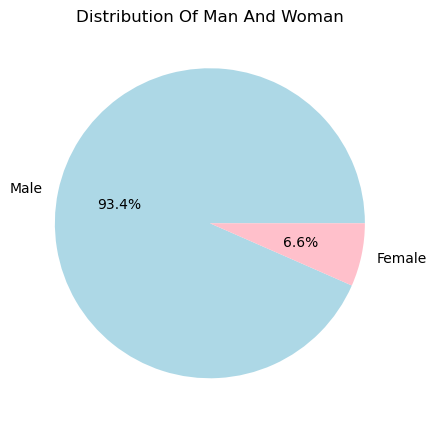

In [11]:
# בדיקת כמות נשים וגברים
sex_counts = jour['Sex'].value_counts()
plt.figure(figsize = (5,7))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['#ADD8E6', 'pink'])
plt.title("Distribution Of Man And Woman")
plt.show()

0       10.0
1       10.0
2       10.0
3        8.0
4        8.0
        ... 
1777     8.0
1778     7.0
1779     6.0
1780     2.0
1781     1.0
Name: month, Length: 1781, dtype: float64


<div dir="rtl">

###### הרוב המוחלט של העיתונאים שנהרגו הם גברים, ייתכן וכי אלה נוכחים יותר באזורי קרב.

<div dir="rtl"> 

##### נרצחו / מתו בלחימה או בחילופי אש / משימה מסוכנת
</div>

In [12]:
print(jour['Type_death'].unique())
jour['Type_death'].value_counts()

['Crossfire/Combat-Related' 'Dangerous Assignment' 'Murder' 'Unknown' nan]


Type_death
Murder                      796
Crossfire/Combat-Related    265
Dangerous Assignment        152
Unknown                       4
Name: count, dtype: int64

C:\Users\loren\AppData\Local\Temp\ipykernel_14584\3057343862.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


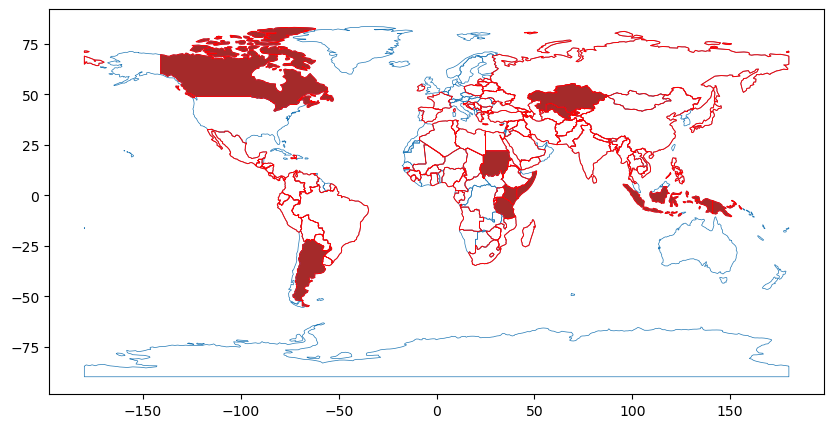

The All Countries, Red Lines: ['Iraq' 'Libya' 'Pakistan' 'Yemen' 'Syria' 'Brazil' 'Ukraine' 'Mexico'
 'Turkey' 'Afghanistan' 'India' 'Guinea' 'Somalia' 'France' 'Bangladesh'
 'Ghana' 'Colombia' 'USA' 'Poland' 'Kenya'
 'Democratic Republic of the Congo' 'Guatemala' 'South Sudan' 'Paraguay'
 'Myanmar' 'Israel and the Occupied Palestinian Territory'
 'Central African Republic' 'Philippines' 'Egypt' 'South Africa' 'Mali'
 'Russia' 'Iran' 'Cambodia' 'Tanzania' 'Ecuador' 'Lebanon' 'Indonesia'
 'Bahrain' 'Nigeria' 'Thailand' 'Azerbaijan' 'Panama' 'Peru'
 'Dominican Republic' 'Ivory Coast' 'El Salvador' 'Tunisia' 'Uganda'
 'Angola' 'Belarus' 'Greece' 'Rwanda' 'Cameroon' 'Honduras' 'Kazakhstan'
 'Sri Lanka' 'Madagascar' 'Venezuela' 'Nepal' 'Croatia' 'Georgia'
 'Bolivia' 'Kyrgyzstan' 'Eritrea' 'Zimbabwe' 'Haiti' 'Turkmenistan'
 'Sudan' 'China' 'Sierra Leone' 'Serbia' 'Gambia' 'Nicaragua'
 'Saudi Arabia' 'Japan' 'Latvia' 'UK' 'Costa Rica' 'Algeria' 'Yugoslavia'
 'Mozambique' 'Spain' 'Uruguay' 'Ea

Country_killed
Iraq              264
Philippines       133
Syria             116
Mexico             89
Pakistan           86
Name: count, dtype: int64

In [13]:
#מפה
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# הסרת ערכים ריקים
jour = jour.dropna(subset=['Country_killed'])

countries = jour['Country_killed'].unique()

# סינון המדינות והצגת עשירייה ראשונה
filtered_world = world[world['name'].isin(countries)]
top10 = filtered_world.head(10)

# design:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
world.boundary.plot(ax=ax, linewidth=0.5)
filtered_world.boundary.plot(ax=ax, linewidth=0.7, edgecolor='red')
top10.plot(ax=ax, color='brown')

plt.show()

print('The All Countries, Red Lines:' ,jour['Country_killed'].unique())
jour[['Country_killed']].value_counts().head(5)

<div dir="rtl"> 

##### ניתן לראות כי הפריסת בעולם רחבה מאוד  
##### לכן החלטנו להציג את 5 המדינות בהן מספר העיתונאים שנהרגו הוא הגבוה ביותר 

</div>

In [14]:
philippines_killed = jour[jour['Country_killed'] == 'Philippines']
mexico_killed = jour[jour['Country_killed'] == 'Mexico']
pakistan_killed = jour[jour['Country_killed'] == 'Pakistan']

In [15]:
type_death_counts_philippines = philippines_killed['Type_death'].value_counts()
type_death_counts_mexico = mexico_killed['Type_death'].value_counts()
type_death_counts_pakistan = pakistan_killed['Type_death'].value_counts()

<div dir="rtl">

##### נבדוק מדינות ערביות שידוע כי יש בהן מלחמות רבות

</div>

In [16]:
iraq_killed = jour[jour['Country_killed'] == 'Iraq']
syria_killed = jour[jour['Country_killed'] == 'Syria']
syria_killed = syria_killed[syria_killed['Type_death'] != 'Unknown']  # נסיר ארבעה שאינם ידועים לויזואליות ייצוגית יותר

In [17]:
type_death_counts_iraq = iraq_killed['Type_death'].value_counts()
type_death_counts_syria = syria_killed['Type_death'].value_counts()

In [18]:
df = pd.DataFrame({
    'Philippines': type_death_counts_philippines,
    'Mexico': type_death_counts_mexico,
    'Pakistan': type_death_counts_pakistan,
    'Iraq' : type_death_counts_iraq,
    'Syria' : type_death_counts_syria
}).fillna(0)

(array([0, 1, 2]),
 [Text(0, 0, 'Crossfire/Combat-Related'),
  Text(1, 0, 'Dangerous Assignment'),
  Text(2, 0, 'Murder')])

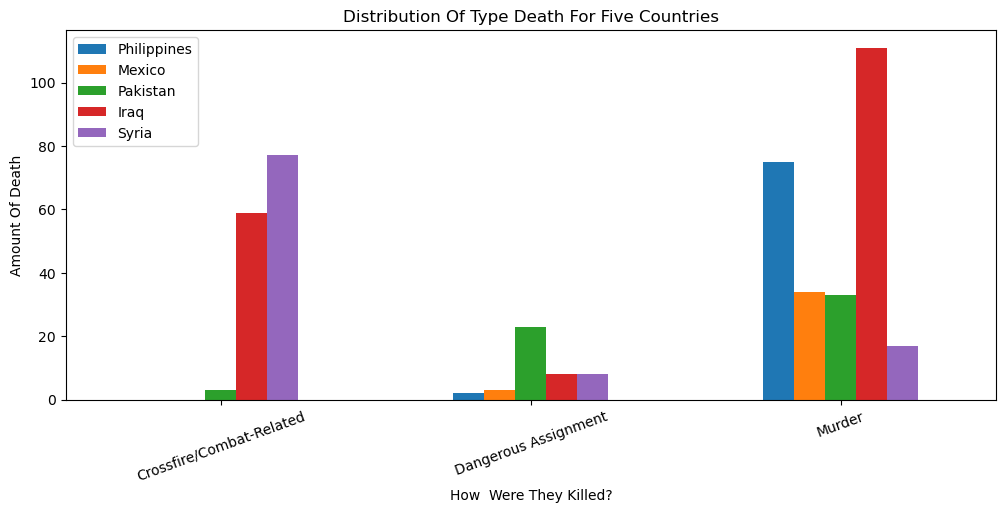

In [19]:
ax = df.plot(kind='bar', figsize=(12, 4.8))
ax.set_title('Distribution Of Type Death For Five Countries')
ax.set_xlabel('How  Were They Killed?')
ax.set_ylabel('Amount Of Death')
plt.xticks(rotation=20)

<div dir="rtl">
    
##### הגרף מציג לנו את הצורה בה נהרגו עיתונאים במספר מדינות.

##### באופן מפתיע, רצח, היא הסיבה העיקרית למותם ולא הריגה בשוגג. 

##### ניתן לראות מהגרף, שבמדינות עולם שלישי, הרוויות בפשיעה, יש רוב של נרצחים - מה שמתכתב גם עם ההיגיון.
  
##### בסוריה לעומת זאת, מדינה עם מלחמות חיצוניות ופנימיות כאחד, הרוב המוחלט נהרגו בחילופי אש או בלחימה ולא במכוון.
    
##### גם בעיראק, רצח הוא המוביל. אך דבר זה גורם לתהייה, שהרי עיראק היא מדינה שחוותה מלחמות רבות, ועדיין, פי 2 מכלל העיתונאים נהרגו שלא בשוגג 

</div>

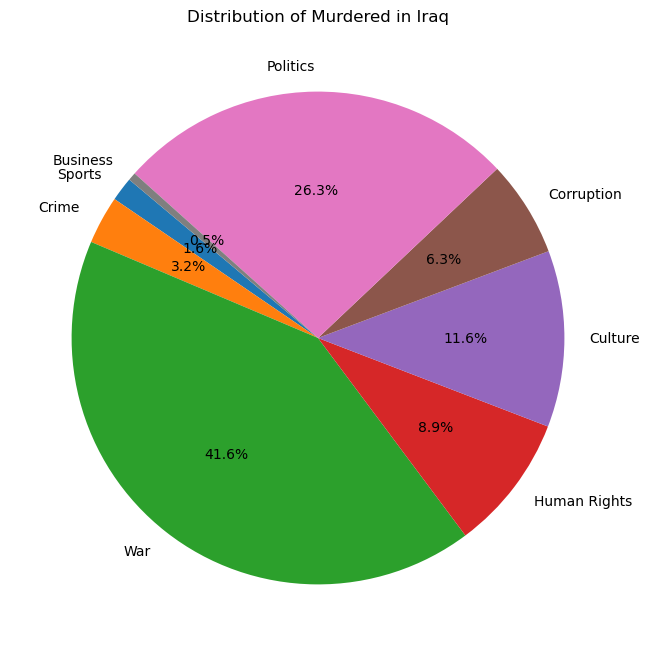

In [20]:
# מתוך עיראק בלבד נציג את הנרצחים כמשתנה

iraq_murdered = jour[(jour['Country_killed'] == 'Iraq') & (jour['Type_death'] == 'Murder')]

# מתוך המשתנה הזה נעשה בדיקה מאיזה תחום

sports = iraq_murdered['Sports'].sum()
crime = iraq_murdered['Crime'].sum()
war = iraq_murdered['War'].sum()
human_rights = iraq_murdered['Human Rights'].sum()
culture = iraq_murdered['Culture'].sum()
corruption = iraq_murdered['Corruption'].sum()
politics = iraq_murdered['Politics'].sum()
busines = iraq_murdered['Business'].sum()


counts = [sports, crime, war, human_rights, culture, corruption, politics, busines]
fields = ['Sports', 'Crime', 'War', 'Human Rights', 'Culture', 'Corruption', 'Politics', 'Business']

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=fields, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Murdered in Iraq')
plt.show()

In [21]:
iraq_murdered = jour[(jour['Country_killed'] == 'Iraq') & (jour['Type_death'] == 'Murder')]
iraq_murdered_count = iraq_murdered.shape[0]
print(iraq_murdered_count)

111


<div dir="rtl">

###### משום שישנם עיתונאים שסיקרו תחומים שונים, הראנו את ההתפלגות באחוזים ולא בצורה נומרית.
###### במידה והיינו מציגים בצורה כמותית, הספירה הייתה עוברת את כמות הנרצחים באופן כללי מה שלא ייתכן

<div dir="rtl">
    
### אירועים מרכזיים שהתרחשו ברחבי העולם ב-23 בנובמבר 2009
**טבח מגדינאנו:** באותו יום התרחש טבח במגדינאנו, הפיליפינים. הטבח הזה נחשב לאחת התקריות האלימות הקשות ביותר בתולדות הפיליפינים. במהלך התקרית, חמושים רצחו לפחות 57 בני אדם, כולל עיתונאים, עורכי דין ותומכים של פוליטיקאי מקומי שהיה אמור להגיש את מועמדותו לבחירות המקומיות. האירוע הזה גרם לזעזוע עולמי ולהוקעת האלימות הפוליטית במדינה.
הטבח במגדינאנו נחשב לאחד האירועים הקטלניים ביותר בעולם נגד עיתונאים, והוא מדגיש את הסכנות והאתגרים שעמם מתמודדים עיתונאים באזורים מסוכנים.

**פתיחת משפטי טרוריסטים בארה"ב:** באותו יום נפתחו משפטים של טרוריסטים בארצות הברית, ביניהם גם משפטי חברי אל-קאעידה שהיו מעורבים בפיגועי ה-11 בספטמבר 2001

</div>

#### תיאור הקוד של התמונה למעלה - הוספנו את זה כאן כדי שהנושא ושמותינו יהיו ברורים

In [22]:
#####   זה  לשים  ממש  בסוף #####

from IPython.display import display, HTML
#display(HTML("<img src='https://raw.githubusercontent.com/lauMren/Journalists-Project/main/%D7%A6%D7%99%D7%9C%D7%95%D7%9D%20%D7%9E%D7%A1%D7%9A%202024-06-15%20010310.png' style='max-width:200%; height:200%;'>"))
display(HTML("""
<style>
.img-container {
    width: 100%; /* רוחב מלא של האזור */
    height: 800px; /* גובה קבוע של האזור */
    overflow: hidden; /* אין גלילה אוטומטית */
}

.img-container img {
    width: 100%; /* רוחב מלא של התמונה */
    height: 100%; /* גובה מלא של התמונה */
    object-fit: contain; /* התאמה תואמת של התמונה לגודל שנקבע */
}
</style>
<div class="img-container">
    <img src="https://raw.githubusercontent.com/lauMren/Journalists-Project/main/%D7%A6%D7%99%D7%9C%D7%95%D7%9D%20%D7%9E%D7%A1%D7%9A%202024-06-15%20010310.png">
</div>
"""))